<a href="https://colab.research.google.com/github/HENRIQUEDEV04/CLASSIFICA-O-REGRESS-O/blob/main/CLASSIFICA%C3%87%C3%83O_REGRESS%C3%83O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

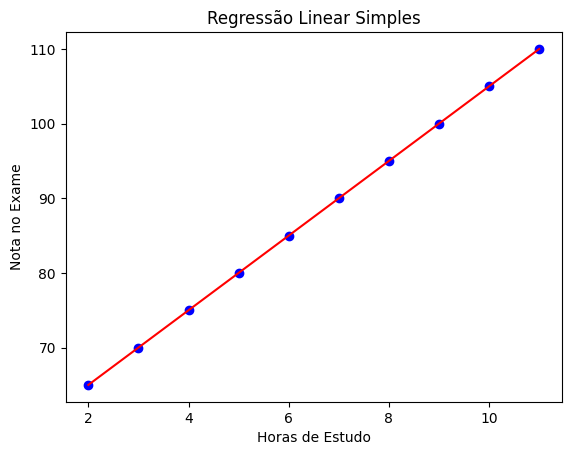

Nota prevista para 8 horas de estudo: 95.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Dados de horas de estudo e notas no exame
horas_estudo = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
notas_exame = np.array([65, 70, 75, 80, 85, 90, 95, 100, 105, 110])

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo
modelo.fit(horas_estudo, notas_exame)

# Coeficientes do modelo
coef_angular = modelo.coef_[0]
coef_linear = modelo.intercept_

# Plotar os dados e a reta de regressão
plt.scatter(horas_estudo, notas_exame, color='blue')
plt.plot(horas_estudo, modelo.predict(horas_estudo), color='red')
plt.title("Regressão Linear Simples")
plt.xlabel("Horas de Estudo")
plt.ylabel("Nota no Exame")
plt.show()

# Fazer previsões com o modelo
horas_estudo_novo = np.array([[8]]) # Horas de estudo do novo aluno
nota_prevista = modelo.predict(horas_estudo_novo)
print("Nota prevista para {} horas de estudo: {:.2f}".format(horas_estudo_novo[0][0], nota_prevista[0]))


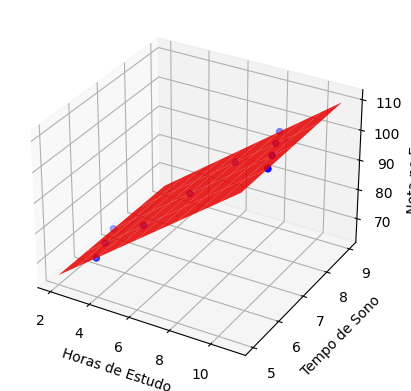

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Dados de horas de estudo, tempo de sono e notas no exame
horas_estudo = np.array([2, 3, 4, 5, 6, 7, 8, 9, 10, 11]).reshape(-1, 1)
tempo_sono = np.array([7, 6, 5, 6, 7, 8, 9, 8, 7, 6]).reshape(-1, 1)
notas_exame = np.array([65, 70, 75, 80, 85, 90, 95, 100, 105, 110])

# Criar um modelo de regressão linear
modelo = LinearRegression()

# Combinação de horas de estudo e tempo de sono como variáveis independentes
X = np.concatenate((horas_estudo, tempo_sono), axis=1)

# Treinar o modelo
modelo.fit(X, notas_exame)

# Coeficientes do modelo
coef_angular = modelo.coef_
coef_linear = modelo.intercept_

# Plotar os dados em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(horas_estudo, tempo_sono, notas_exame, color='blue')

# Prever notas para o intervalo de horas de estudo e tempo de sono
X_test = np.array([[x, y] for x in range(2, 12) for y in range(5, 10)])
notas_previstas = modelo.predict(X_test)

# Plotar o plano de regressão
x_surf, y_surf = np.meshgrid(range(2, 12), range(5, 10))
exog = np.column_stack((x_surf.flatten(), y_surf.flatten()))
notas_previstas = modelo.predict(exog)
ax.plot_surface(x_surf, y_surf, notas_previstas.reshape(x_surf.shape), color='red', alpha=0.85)

ax.set_xlabel("Horas de Estudo")
ax.set_ylabel("Tempo de Sono")
ax.set_zlabel("Nota no Exame")

plt.show()


Matriz de Confusão: 
 [[19  0  0]
 [ 0  7  6]
 [ 0  2 11]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.78      0.54      0.64        13
           2       0.65      0.85      0.73        13

    accuracy                           0.82        45
   macro avg       0.81      0.79      0.79        45
weighted avg       0.83      0.82      0.82        45



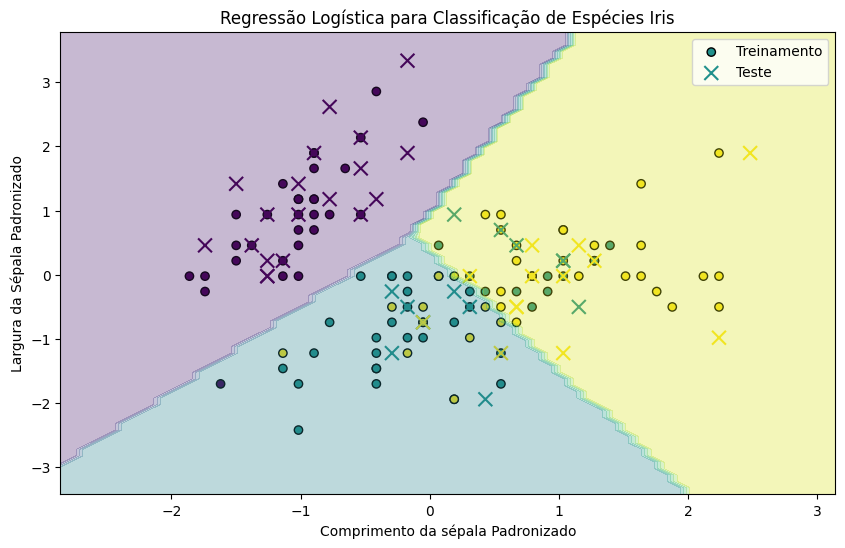

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Passo 1: Carregar o conjunto de dados Iris
iris = load_iris()
X = iris.data[:, :2]  # Apenas as duas primeiras características para visualização
y = iris.target

# Passo 2: Dividir o conjunto de dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Passo 3: Pré-processamento (padronização)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Passo 4: Criar e treinar o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Passo 5: Fazer previsões no conjunto de teste
y_pred = model.predict(X_test_scaled)

# Passo 6: Avaliar o desempenho do modelo
print("Matriz de Confusão: \n", confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Passo 7: Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotar os pontos de dados de treinamento
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis', edgecolors='k', label='Treinamento')

# Plotar os pontos de dados de teste
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis', marker='x', s=100, label='Teste')

# Plotar as regiões de decisão
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
XX, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[XX.ravel(), yy.ravel()])
Z = Z.reshape(XX.shape)
plt.contourf(XX, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Comprimento da sépala Padronizado')
plt.ylabel('Largura da Sépala Padronizado')
plt.title("Regressão Logística para Classificação de Espécies Iris")
plt.legend()
plt.show()


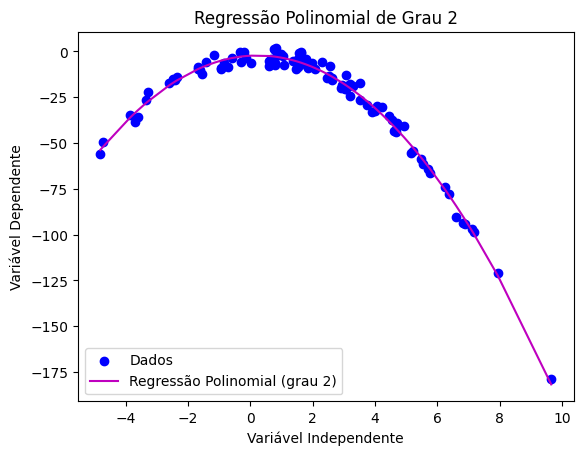

Coeficiente: [ 0.96597113 -2.02225052]
Intercepto: -2.4148356673536178
Erro médio quadrático: 9.447441952450276


In [5]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Definindo a semente para reprodutibilidade
np.random.seed(0)

# Gerando dados sintéticos
X = 2 - 3 * np.random.normal(0, 1, 100)
y = X - 2 * (X ** 2) + np.random.normal(-3, 3, 100)

# Transformando os dados para incluir termos polinomiais
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X.reshape(-1, 1))

# Criando e treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_poly, y)
y_pred = model.predict(X_poly)

# Plotando os dados e o modelo
plt.scatter(X, y, color='blue', label='Dados')
plt.plot(np.sort(X), y_pred[np.argsort(X)], color='m', label='Regressão Polinomial (grau 2)')

# Avaliando o modelo
mse = mean_squared_error(y, y_pred)

# Exibindo o gráfico
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Regressão Polinomial de Grau 2')
plt.legend()
plt.show()

# Imprimindo os coeficientes do modelo
print('Coeficiente:', model.coef_)
print('Intercepto:', model.intercept_)
print('Erro médio quadrático:', mse)


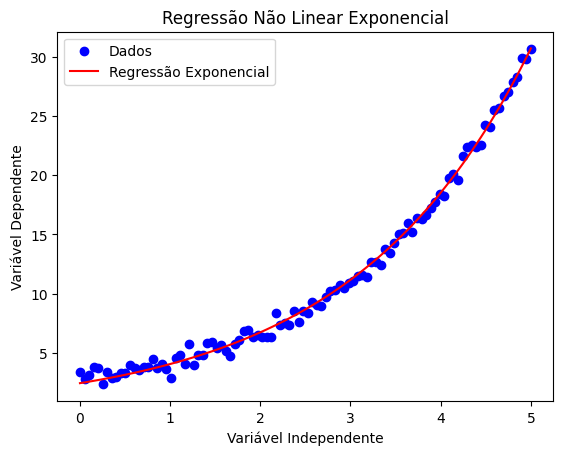

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Função modelo para ajustar aos dados
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Gerar dados sintéticos
np.random.seed(0)
x = np.linspace(0, 5, 100)
y = 2.5 * np.exp(0.5 * x) + np.random.normal(0, 0.5, 100)

# Ajustar o modelo aos dados usando curve_fit
params, _ = curve_fit(modelo_exponencial, x, y)

# Plotar os dados e a curva ajustada
plt.scatter(x, y, color='blue', label='Dados')
plt.plot(x, modelo_exponencial(x, *params), color='red', label='Regressão Exponencial')

# Configurar título e legendas do gráfico
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.title('Regressão Não Linear Exponencial')
plt.legend()
plt.show()
